In [37]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [38]:
tf.__version__

'2.8.0'

## Simple Regression Model

$f(x)=W.x+b$

In [39]:
true_w=3.0
true_b=2.0

num_samples=1000
x=tf.random.normal(shape=[num_samples])

In [40]:
noise=tf.random.normal(shape=[num_samples])

In [41]:
y=x*true_w+true_b+noise

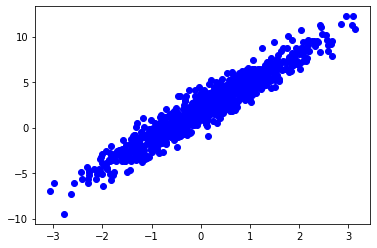

In [42]:
plt.scatter(x,y,c='b')

In [43]:
#Define a model
class mymodel(tf.Module):
  def __init__(self,**kwargs):
    super().__init__(**kwargs)

    #initializing weights
    self.w=tf.Variable(5.0)
    self.b=tf.Variable(0.0)

  def __call__(self,x):
    return self.w*x+self.b


In [44]:
model=mymodel()
model(3)  #calling magic methods

<tf.Tensor: shape=(), dtype=float32, numpy=15.0>

In [45]:
model.w

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0>

In [46]:
model.variables

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0>)

## Define loss function

In [47]:
def MSE_loss(target_y,perdicted_y):
  error=target_y-perdicted_y
  sq_error=tf.square(error)
  mse=tf.reduce_mean(sq_error)
  return mse

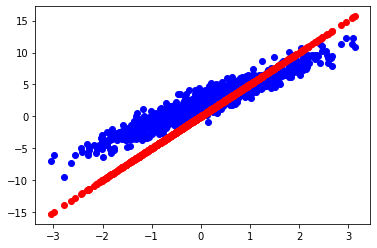

In [48]:
#model without training
plt.scatter(x,y,c='b')
pred_y=model(x)   
plt.scatter(x,pred_y,c='r')
plt.show()

In [49]:
current_loss=MSE_loss(y,model(x))
current_loss.numpy()

8.216788

##Training function definition

In [53]:
def train(model,x,y,learning_rate):
  with tf.GradientTape() as tape:
    current_loss=MSE_loss(y,model(x))

  dc_dw,dc_db=tape.gradient(current_loss,[model.w,model.b])
  model.w.assign_sub(learning_rate*dc_dw)
  model.b.assign_sub(learning_rate*dc_db)

In [54]:
model=mymodel()
Ws,bs=[],[]
epochs=10
learning_rate=0.1
w=model.w.numpy()
b=model.b.numpy()
init_loss=MSE_loss(y,model(x))
print(f'Initial weight:{w}, initial bias:{b}, initial_loss:{init_loss}')

Initial weight:5.0, initial bias:0.0, initial_loss:8.216788291931152


In [55]:
for epoch in range(epochs):
  train(model,x,y,learning_rate)
  Ws.append(model.w.numpy())
  bs.append(model.b.numpy())

  current_loss=MSE_loss(y,model(x))
  print(f"For epoch:{epoch}, W:{Ws[-1]}, b={bs[-1]},current loss:{current_loss}")

For epoch:0, W:4.609498977661133, b=0.3591761887073517,current loss:5.674195766448975
For epoch:1, W:4.298523426055908, b=0.6531366109848022,current loss:4.019936561584473
For epoch:2, W:4.050743103027344, b=0.8935762643814087,current loss:2.942887544631958
For epoch:3, W:3.853210687637329, b=1.0901281833648682,current loss:2.241194248199463
For epoch:4, W:3.6956534385681152, b=1.250718116760254,current loss:1.7837728261947632
For epoch:5, W:3.5699169635772705, b=1.3818608522415161,current loss:1.4854263067245483
For epoch:6, W:3.4695241451263428, b=1.4889063835144043,current loss:1.2907366752624512
For epoch:7, W:3.389326810836792, b=1.576244592666626,current loss:1.1636320352554321
For epoch:8, W:3.3252315521240234, b=1.6474746465682983,current loss:1.0806161165237427
For epoch:9, W:3.2739810943603516, b=1.70554518699646,current loss:1.0263751745224


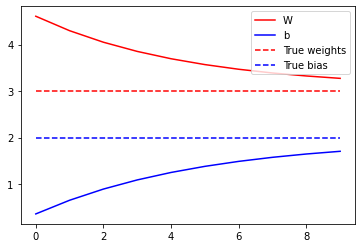

In [56]:
plt.plot(range(epochs),Ws,'r',range(epochs),bs,'b')
plt.plot([true_w]*epochs,'r--',[true_b]*epochs,'b--')
plt.legend(['W','b','True weights','True bias'])
plt.show()

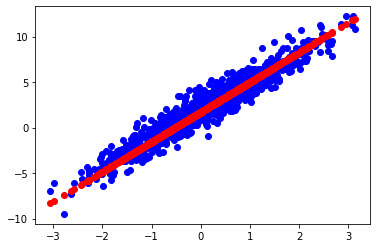

In [57]:
#model after training
plt.scatter(x,y,c='b')
pred_y=model(x)   
plt.scatter(x,pred_y,c='r')
plt.show()